In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)


        
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


In [2]:
pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
# pth_2 = '/data/fast1/glacierml/data/RGI/rgi60-attribs/'
RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])
for file in tqdm(os.listdir(pth_2)):
    file_reader = pd.read_csv(pth_2 + file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = pd.concat([RGI_extra, file_reader], ignore_index = True)

    # select only RGI data that was used to train the model   
RGI = RGI_extra[[
'RGIId',
    'Farinotti Mean Thickness'
]]
print(RGI)

100%|██████████| 19/19 [00:01<00:00, 16.47it/s]

                 RGIId Farinotti Mean Thickness
0       RGI60-16.00001                      NaN
1       RGI60-16.00002                      NaN
2       RGI60-16.00003                      NaN
3       RGI60-16.00004                      NaN
4       RGI60-16.00005                      NaN
...                ...                      ...
216496  RGI60-08.03413                      NaN
216497  RGI60-08.03414                      NaN
216498  RGI60-08.03415                      NaN
216499  RGI60-08.03416                      NaN
216500  RGI60-08.03417                      NaN

[216501 rows x 2 columns]


In [3]:

# print(RGI['RGIId'])

pth_1 = '/home/simonhans/data/prethicktor/RGI/outlines/'
# rootdir = '~'
for region_number in range(1,20,1):
            
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
        
    region_folder = pth_1 + 'RGI60-' + str(region_number) + '/'
    for file in tqdm(os.listdir(region_folder)):
        im = Image.open(region_folder + file)
        imarray = np.array(im)
        df = pd.DataFrame(imarray)
        df = df.replace(0.0, np.nan)
        print(df)
        mean_glacier_thickness = df.mean().mean()
        print(mean_glacier_thickness)
        RGI['Farinotti Mean Thickness'].loc[RGI['RGIId'] == file[:14]] = mean_glacier_thickness
        break
    break

FileNotFoundError: [Errno 2] No such file or directory: '/home/simonhans/data/prethicktor/RGI/results_model_5/RGI60-01/'

In [3]:
df = pd.read_csv('Farinotti_mean_thickness_RGI_ID.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,RGIId,Farinotti Mean Thickness
0,RGI60-16.00001,14.781389
1,RGI60-16.00002,19.173927
2,RGI60-16.00003,12.216245
3,RGI60-16.00004,11.457233
4,RGI60-16.00005,11.774138
...,...,...
216496,RGI60-08.03413,15.176277
216497,RGI60-08.03414,28.298618
216498,RGI60-08.03415,20.813330
216499,RGI60-08.03416,97.812881


In [4]:
RGI = gl.RGI_loader(
#     pth = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
)

In [5]:
RGI = RGI.sort_values('RGIId')
RGI

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981
...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255
216497,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130
216498,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329
216499,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106


In [ ]:
RGIf = pd.merge(RGI, df, on = 'RGIId')
RGIf

In [6]:
df = pd.read_csv('RGI_W_Farinotti_Thicknesses.csv')
df = df.drop('Unnamed: 0', axis = 1)
df = df.sort_values('RGIId')
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,19.988911
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,29.413267
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,31.862368
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,45.454708
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,43.040817
...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.593313
216497,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,20.532068
216498,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,55.923466
216499,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,10.181019


25it [01:57,  4.69s/it]


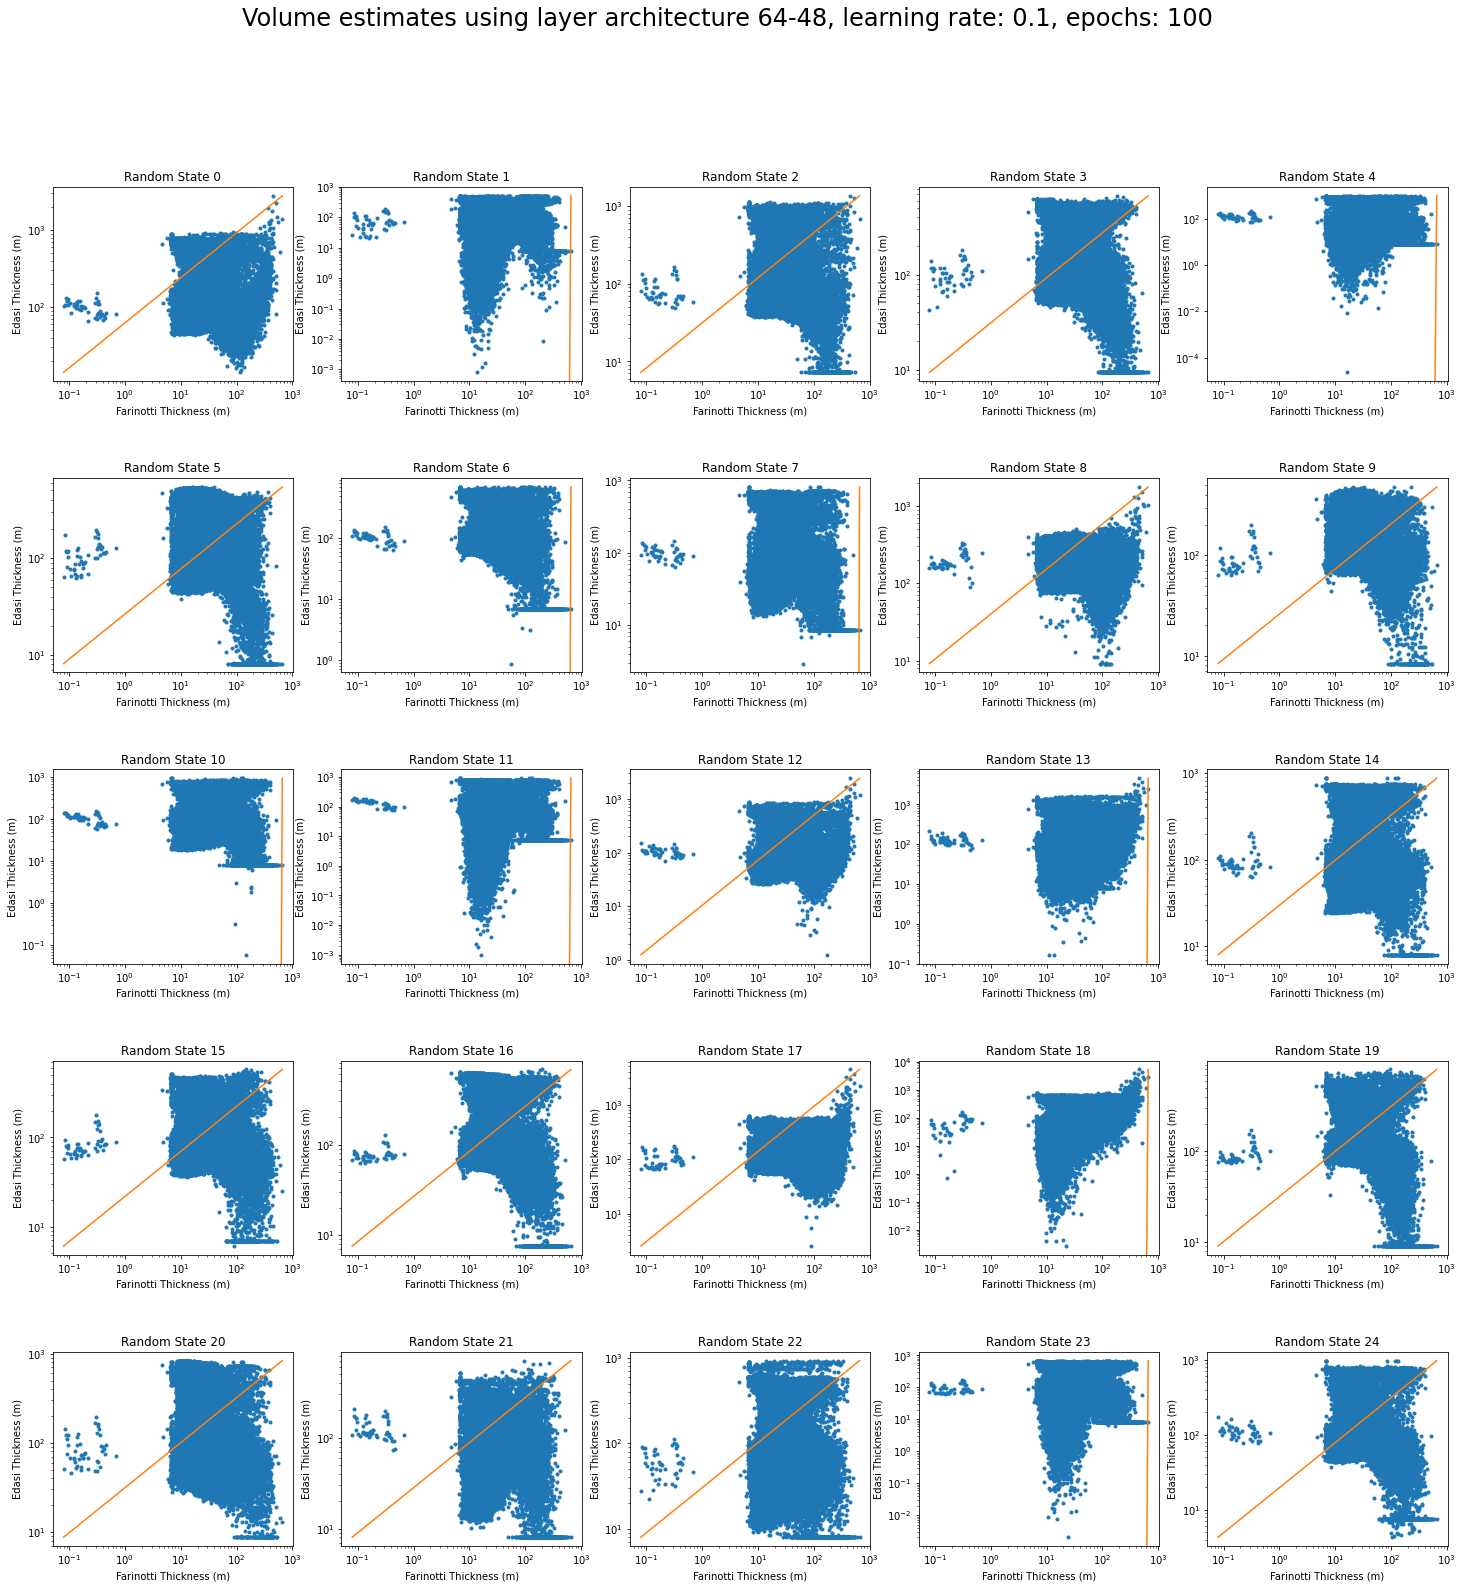

In [9]:
RGI = RGI.drop('RGIId', axis = 1)

arch = '64-48'
top_learning_rate = 0.1
epochs = 100
dropout = 1

fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(
    'Volume estimates using layer architecture ' + str(arch) +
    ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
             , fontsize=24, y=0.98
            )
fig.patch.set_facecolor('w')



df7 = gl.data_loader(
# root_dir = '/home/simonhans/data/prethicktor/'
)
module = 'sm7'
res = 'sr7'
dataset = df7 
dataset.name = 'df7'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'

dnn_model = {}
RS = range(0,25,1)
for n, rs in tqdm(enumerate(RS)):
    ax = plt.subplot(5, 5, n + 1)
    model_name = (
        str(arch) + 
        '_' + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )   
    
    model_path = (
        rootdir + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    
    
    
    dnn_model[model_name] = tf.keras.models.load_model(model_path)
    
    
    y = dnn_model[model_name].predict(RGI, verbose = 0)
    
    plt.plot(df['Farinotti Mean Thickness'],y,'.')
    plt.plot(
        (df['Farinotti Mean Thickness'].min(),df['Farinotti Mean Thickness'].max()),
        (y.min(),y.max()),
        '-'
    )    
    plt.xlabel('Farinotti Thickness (m)')
    plt.ylabel('Edasi Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.yscale('log')
    plt.xscale('log')
#     plt.xlim((0,400))
#     plt.ylim((0,400))
# plt.savefig('/home/simonhans/Desktop/test_fig.png')

25it [02:01,  4.85s/it]


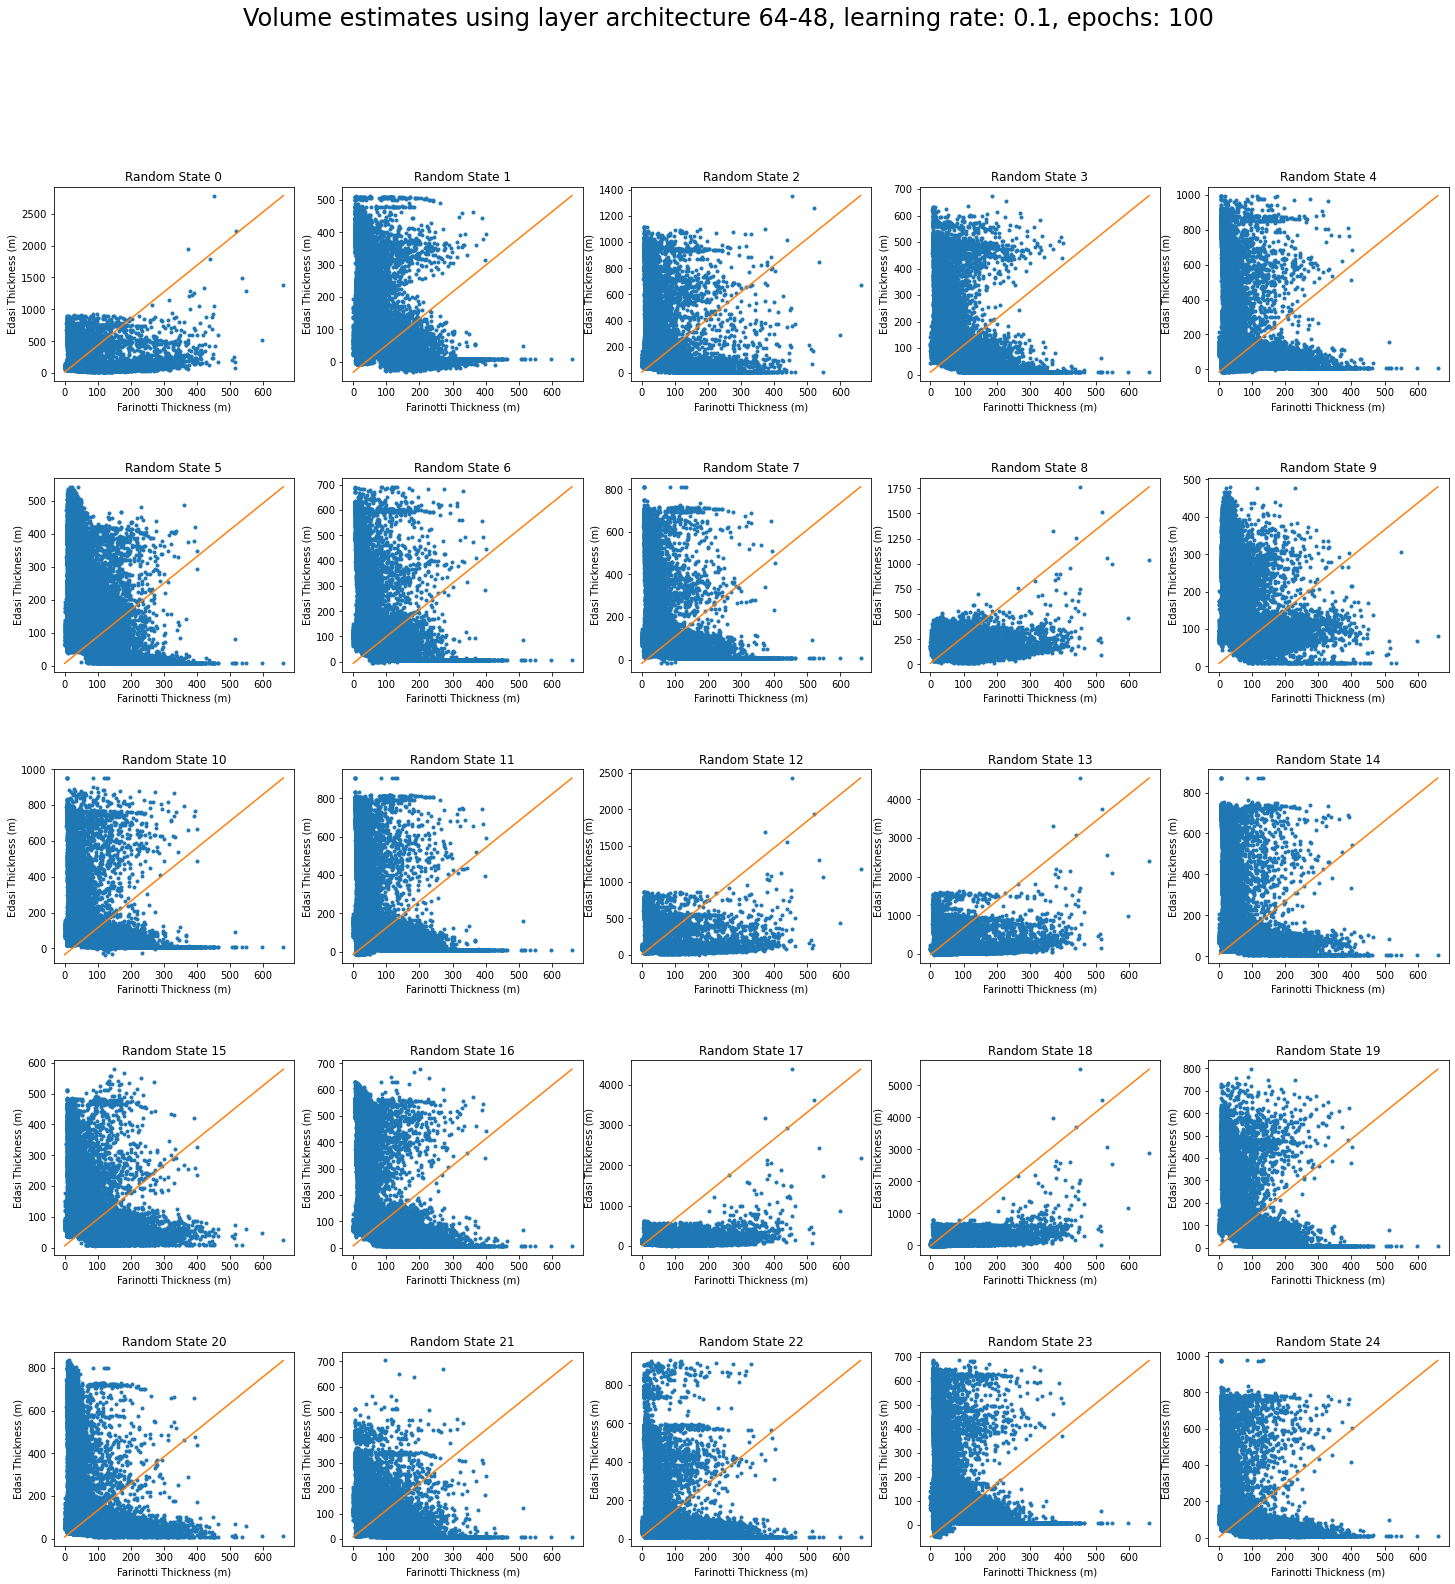

In [10]:

arch = '64-48'
top_learning_rate = 0.1
epochs = 100
dropout = 1

fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(
    'Volume estimates using layer architecture ' + str(arch) +
    ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
             , fontsize=24, y=0.98
            )
fig.patch.set_facecolor('w')



df7 = gl.data_loader(
# root_dir = '/home/simonhans/data/prethicktor/'
)
module = 'sm7'
res = 'sr7'
dataset = df7 
dataset.name = 'df7'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'

dnn_model = {}
RS = range(0,25,1)
for n, rs in tqdm(enumerate(RS)):
    ax = plt.subplot(5, 5, n + 1)
    model_name = (
        str(arch) + 
        '_' + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )   
    
    model_path = (
        rootdir + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    
    
    
    dnn_model[model_name] = tf.keras.models.load_model(model_path)
    
    
    y = dnn_model[model_name].predict(RGI, verbose = 0)
    df = pd.concat([df, pd.Series(y.flatten(), name = rs)], axis = 1)
    plt.plot(df['Farinotti Mean Thickness'],y,'.')
    plt.plot(
        (df['Farinotti Mean Thickness'].min(),df['Farinotti Mean Thickness'].max()),
        (y.min(),y.max()),
        '-'
    )
    plt.xlabel('Farinotti Thickness (m)')
    plt.ylabel('Edasi Thickness (m)')
    ax.set_title('Random State ' +str(rs))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlim((0,400))
#     plt.ylim((0,400))
# plt.savefig('/home/simonhans/Desktop/test_fig.png')

In [ ]:
df_copy = df.copy()

In [21]:
# df_copy = df_copy.drop(0, axis = 1)
# df = df.drop(df.columns[12], axis=1, inplace=True)
# df

# df['Edasi Mean Thickness'] = df.mean([[
#     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#     '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'
#     '20', '21', '22', '23', '24'
# ]], axis=1)
df_y = df[[
    0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
]]
df['Edasi Mean Thickness'] = df_y.mean(axis = 1)
# df['Edasi Mean Thickness'] = df_y.mean(axis = 0)
# # len(df_y.isna())
# df = df[[
#     'RGIId'
#     'CenLat',
#     'CenLon',
#     'Slope',
#     'Zmin',
#     'Zmed',
#     'Zmax',
#     'Area',
#     'Aspect',
#     'Lmax',
#     'Farinotti Mean Thickness',
#     'Edasi Mean Thickness'
# ]]
df = df.dropna()
df_copy = df.copy()

In [29]:
temp_df = df_copy.loc[df_copy['RGIId'].str.contains('RGI60-03')]
temp_df['Farinotti Mean Thickness'].mean()

64.8189379557276

In [ ]:
#### KMeans elbow plot for RGI at fegion scale 

dft = df[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax',
#     'Farinotti Mean Thickness',
#     'Edasi Mean Thickness'
]]
fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)
fig.patch.set_facecolor('w')
# ELBOW PLOT START

x = df.iloc[:,[0,1,2,3,4,5,6,7,8]]
print(x)
distortions = []
K = range(1,20)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.suptitle(
    'The Elbow Method showing the optimal clusters', 
    fontsize=18, y=0.95)

# ELBOW PLOT END

plt.show()    

In [ ]:
df = df.dropna()

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
df['cluster'] = kmeans.fit_predict(df)
print(len(km_y))
fig, ax = plt.subplots(1, 1, figsize = (20,20))
fig.patch.set_facecolor('w')
plt.suptitle(
    'Cluster Analysis of RGI',
    fontsize=18, y=0.95
)

plt.scatter(
    df['Farinotti Mean Thickness'],
    df['Edasi Mean Thickness'],
    c = df['cluster'],
    label = km_y,
    cmap = 'viridis',
    alpha = 0.5,
    marker = '.'
)
plt.plot(
    (0,700),
    (0,700),
    '-'
)
# ax.set_xlim(0, 700)
# ax.set_ylim(0, 700)

ax.set_xlabel('Farinotti Mean Thickness')
ax.set_ylabel('Edasi Mean Thickness')
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
plt.savefig('figs/RGI_volume_comparison_cluster.eps')
plt.savefig('figs/RGI_volume_comparison_cluster.png')

In [ ]:
df

In [14]:
df['Farinotti Mean Thickness'].mean()

28.243614250235126

<AxesSubplot:xlabel='Farinotti Mean Thickness', ylabel='Edasi Mean Thickness'>

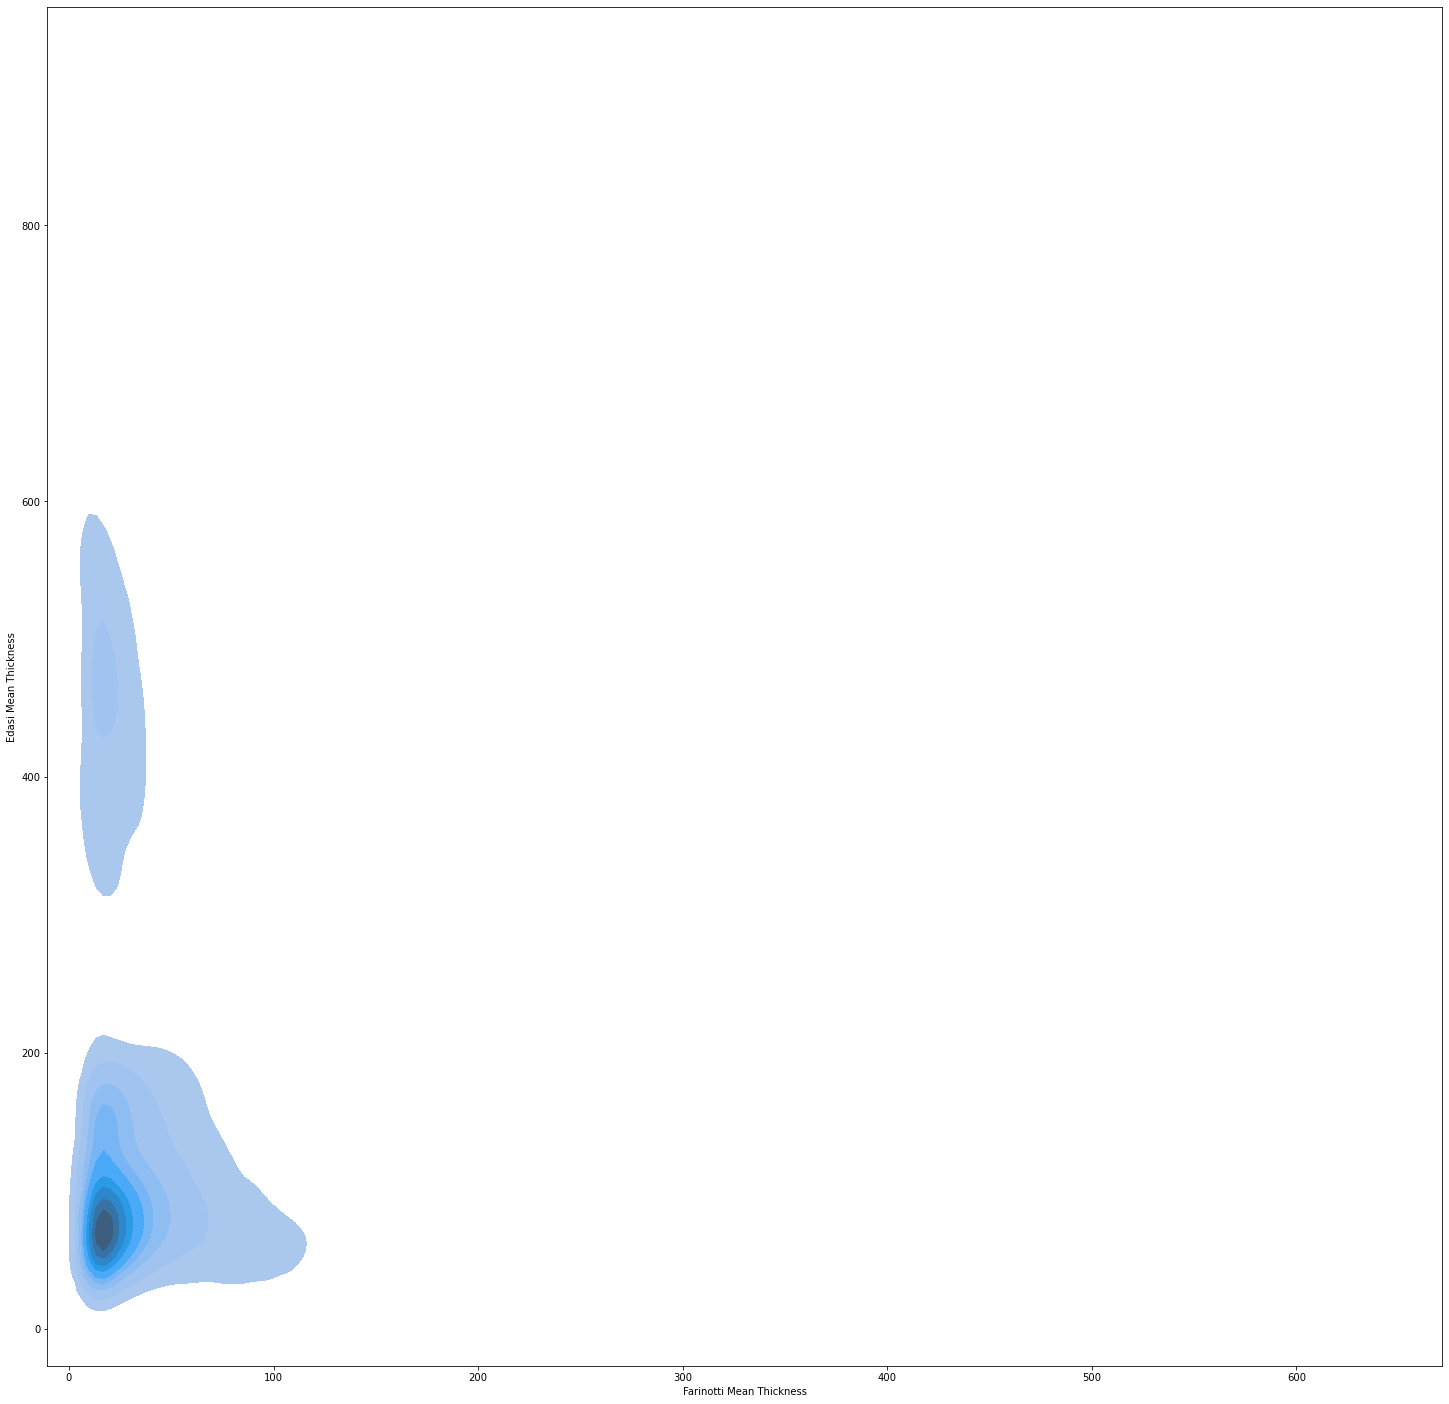

In [20]:
fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
# plt.suptitle(
#     'Volume estimates using layer architecture ' + str(arch) +
#     ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
#              , fontsize=24, y=0.98
#             )
fig.patch.set_facecolor('w')

ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

sns.kdeplot(
    x = df['Farinotti Mean Thickness'], 
    y = df['Edasi Mean Thickness'],
    fill = True
)


In [15]:
df['Edasi Mean Thickness'].mean()

120.37203

In [ ]:
# fold here
dft_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]

for attribute in dft_list:
    

    fig, ax = plt.subplots(1, 1, figsize = (20,20))
    fig.patch.set_facecolor('w')
    plt.suptitle(
        'Cluster Analysis of RGI ' + attribute + 
        ' against RGI Attribute', 
        fontsize=18, y=0.95
    )

    for n, att in enumerate(dft_list):
        ax = plt.subplot(3,2,n+1)

        plt.scatter(
            df[attribute],
            df[att],
            c = df['cluster'], 
            cmap = 'viridis',
            alpha = 0.5, 
            marker = '.'

        )
        if attribute == 'Area' or 'Lmax':
            plt.xscale('log')
        if att == 'Area' or 'Lmax':
            plt.yscale('log')
        ax.set_xlabel('RGI ' + attribute)
        ax.set_ylabel('RGI '+ att)
        ax.set_title('RGI ' + attribute )


#         for i in df.index:
#             plt.text(
#                 x = dft[attribute].loc[i] + 0.02,
#                 y = (
#                     dft[att].loc[i]) + 0.02,
#                 s = df['dataframe'].str[4:].loc[i] + '-' + str(dft[stat].loc[i])
#             )

In [ ]:
df.sort_values('Edasi Mean Thickness')

In [ ]:
y.max()